# Sony interview solutions

## 1: Work out exactly how we differentiate between Reclaims and Renewals.

### First step will be to load the CSV, see what we are dealing with

In [1]:
import pandas as pd

df = pd.read_csv('playstation.csv')

In [2]:
df.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
0,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15
1,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15
2,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16
3,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16
4,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16


In [3]:
df.head(20)

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
0,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15
1,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15
2,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16
3,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16
4,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16
5,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-08-16,2020-09-16
6,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-10-19,2020-11-19
7,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-11-19,2020-12-19
8,3.323170e+14,Paid,Wallet,1 month,Reclaim,2019-07-16,2019-08-16
9,7.157850e+14,Free,Trial,14 days,Trial,2019-07-02,2019-07-16


# So, looking at the data we can see that reclaim is when you restart a subscription that was previously unused, and renewal is when you simply continue the existing subscription

## What was our paid net growth on the 20th of September?

In [4]:
max(df['SUB_START_DATE'])

'2020-12-31'

In [5]:
min(df['SUB_START_DATE'])

'2019-06-01'

### Ok so the question is asking the net growth between sept 20th 2019 and sept 20th 2020 I believe

In [6]:
sept_2019 = df[df['SUB_START_DATE'] == '2019-09-20']
sept_2019.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
198,9.234640e+14,Paid,Wallet,3 months,Renewal,2019-09-20,2019-12-20
1335,8.306420e+14,Paid,Wallet,1 month,Acquisition,2019-09-20,2019-10-20
3727,9.209670e+14,Paid,Wallet,1 month,Renewal,2019-09-20,2019-10-20
4480,7.898460e+14,Paid,Wallet,12 months,Renewal,2019-09-20,2020-09-20
4566,8.117940e+14,Paid,Retail,3 months,Acquisition,2019-09-20,2019-12-20


In [7]:
paid_2019 = sept_2019[sept_2019['SUBSCRIPTION_BILLABLE_TYPE'] == 'Paid']
paid_2019.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
198,9.234640e+14,Paid,Wallet,3 months,Renewal,2019-09-20,2019-12-20
1335,8.306420e+14,Paid,Wallet,1 month,Acquisition,2019-09-20,2019-10-20
3727,9.209670e+14,Paid,Wallet,1 month,Renewal,2019-09-20,2019-10-20
4480,7.898460e+14,Paid,Wallet,12 months,Renewal,2019-09-20,2020-09-20
4566,8.117940e+14,Paid,Retail,3 months,Acquisition,2019-09-20,2019-12-20


In [8]:
sept_2020 = df[df['SUB_START_DATE'] == '2020-09-20']

paid_2020 = sept_2020[sept_2020['SUBSCRIPTION_BILLABLE_TYPE'] == 'Paid']
paid_2020.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
202,9.234640e+14,Paid,Wallet,3 months,Renewal,2020-09-20,2020-12-20
1161,5.204630e+14,Paid,Wallet,1 month,Renewal,2020-09-20,2020-10-20
1347,8.306420e+14,Paid,Wallet,1 month,Renewal,2020-09-20,2020-10-20
2542,8.281650e+14,Paid,Wallet,1 month,Acquisition,2020-09-20,2020-10-20
2783,2.938440e+14,Paid,Wallet,1 month,Renewal,2020-09-20,2020-10-20


In [9]:
len(paid_2020)-len(paid_2019)

7

# So, if my logic is correct the net growth is of 7 paid accounts if we compare the 2 days

## How many people were on a trial on the 1st of October? Include both people who started a trial and ended a trial on that day.

### So, this question does not specify whether October 1st 2019 or October 1st 2020, but OK I will assume October 1st 2019

In [10]:
trials = df[df['SUB_STATE'] == 'Trial']
trials.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
9,7.157850e+14,Free,Trial,14 days,Trial,2019-07-02,2019-07-16
12,2.763320e+14,Free,Trial,14 days,Trial,2020-02-16,2020-03-01
19,3.930190e+14,Free,Trial,14 days,Trial,2020-08-26,2020-09-09
20,3.392980e+14,Free,Trial,14 days,Trial,2019-11-02,2019-11-16
40,3.775590e+14,Free,Trial,14 days,Trial,2020-08-04,2020-08-18


### We realize quickly that by including people who started a trial and ended a trial on that day, we basically need people whose start date is 14 days before and 14 days after. Let's also check if some trials ran for longer than 14 days, if yes then more complicated code to write

In [11]:
trials['SKU_LENGTH'].unique()

array(['14 days', '7 days'], dtype=object)

#### *we will need to convert the strings to datetime in order to make this work*

In [16]:
trials['SUB_START_DATE']=pd.to_datetime(trials['SUB_START_DATE'], format='%Y-%m-%d')
trials['SUB_END_DATE'] = pd.to_datetime(trials['SUB_END_DATE'], format='%Y-%m-%d')

<ipython-input-16-63bd1f361ffc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['SUB_START_DATE']=pd.to_datetime(trials['SUB_START_DATE'], format='%Y-%m-%d')
<ipython-input-16-63bd1f361ffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['SUB_END_DATE'] = pd.to_datetime(trials['SUB_END_DATE'], format='%Y-%m-%d')


In [17]:
trials['SUB_START_DATE'].dtype

dtype('<M8[ns]')

In [18]:
counter = 0
for index, row in trials.iterrows():
    if row['SUB_START_DATE'] <= pd.to_datetime('2019-10-01') and row['SUB_END_DATE'] >= pd.to_datetime('2019-10-01'):
        counter +=1
counter

80

## If this code is not broken, then there should be exactly 80 people on trial at October 1st 2019. Let's check October 1st 2020 for funsies

In [19]:
counter = 0
for index, row in trials.iterrows():
    if row['SUB_START_DATE'] <= pd.to_datetime('2020-10-01') and row['SUB_END_DATE'] >= pd.to_datetime('2020-10-01'):
        counter +=1
counter

12

# My guess is that the code works

### 4: Plot a graph that shows the paid net growth each month between June and December.

In [22]:
paid = df[df['SUBSCRIPTION_BILLABLE_TYPE'] == 'Paid']
paid['SUB_START_DATE'] = pd.to_datetime(paid['SUB_START_DATE'], format='%Y-%m-%d') #need to comvert to datetime again
paid['SUB_END_DATE'] = pd.to_datetime(paid['SUB_END_DATE'], format='%Y-%m-%d')


<ipython-input-22-c5773c176ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['SUB_START_DATE'] = pd.to_datetime(paid['SUB_START_DATE'], format='%Y-%m-%d') #need to comvert to datetime again
<ipython-input-22-c5773c176ba7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['SUB_END_DATE'] = pd.to_datetime(paid['SUB_END_DATE'], format='%Y-%m-%d')


In [23]:
june_paid= paid[paid['SUB_START_DATE']>= pd.to_datetime('2019-06-01')]
june_paid = june_paid[paid['SUB_START_DATE']<= pd.to_datetime('2019-06-30')]

In [24]:
june_paid

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
21,3.196900e+14,Paid,Wallet,3 months,Renewal,2019-06-15,2019-09-15
44,6.571220e+14,Paid,Wallet,1 month,Renewal,2019-06-28,2019-07-28
173,8.554580e+14,Paid,Wallet,1 month,Reclaim,2019-06-28,2019-07-28
175,2.409290e+14,Paid,Wallet,1 month,Renewal,2019-06-02,2019-07-02
185,8.140980e+14,Paid,Wallet,1 month,Renewal,2019-06-08,2019-07-08
...,...,...,...,...,...,...,...
28066,3.246190e+14,Paid,Wallet,3 months,Renewal,2019-06-17,2019-09-17
28073,5.531260e+14,Paid,Wallet,1 month,Renewal,2019-06-04,2019-07-04
28094,3.895400e+14,Paid,Wallet,1 month,Renewal,2019-06-23,2019-07-23
28132,4.624670e+14,Paid,Wallet,1 month,Reclaim,2019-06-25,2019-07-25


In [25]:
june_paid = paid[paid['SUB_START_DATE'].dt.month == 6]
june_paid = june_paid[june_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

In [26]:
june_paid

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
21,3.196900e+14,Paid,Wallet,3 months,Renewal,2019-06-15,2019-09-15
44,6.571220e+14,Paid,Wallet,1 month,Renewal,2019-06-28,2019-07-28
173,8.554580e+14,Paid,Wallet,1 month,Reclaim,2019-06-28,2019-07-28
175,2.409290e+14,Paid,Wallet,1 month,Renewal,2019-06-02,2019-07-02
185,8.140980e+14,Paid,Wallet,1 month,Renewal,2019-06-08,2019-07-08
...,...,...,...,...,...,...,...
28066,3.246190e+14,Paid,Wallet,3 months,Renewal,2019-06-17,2019-09-17
28073,5.531260e+14,Paid,Wallet,1 month,Renewal,2019-06-04,2019-07-04
28094,3.895400e+14,Paid,Wallet,1 month,Renewal,2019-06-23,2019-07-23
28132,4.624670e+14,Paid,Wallet,1 month,Reclaim,2019-06-25,2019-07-25


In [27]:
july_paid = paid[paid['SUB_START_DATE'].dt.month == 7]
july_paid = july_paid[july_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

In [28]:
august_paid = paid[paid['SUB_START_DATE'].dt.month == 8]
august_paid = august_paid[august_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

In [29]:
september_paid = paid[paid['SUB_START_DATE'].dt.month == 9]
september_paid = september_paid[september_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

In [30]:
october_paid = paid[paid['SUB_START_DATE'].dt.month == 10]
october_paid = october_paid[october_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

In [31]:
november_paid = paid[paid['SUB_START_DATE'].dt.month == 11]
november_paid = november_paid[november_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

In [32]:
december_paid = paid[paid['SUB_START_DATE'].dt.month == 12]
december_paid = december_paid[december_paid['SUB_START_DATE']<= pd.to_datetime('2020-01-01')]

Text(0.5, 1.0, 'Very nice chart which explains everything')

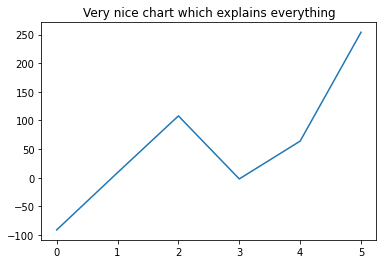

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0,6,1),[len(july_paid)-len(june_paid),len(august_paid)-len(july_paid),len(september_paid)-len(august_paid),\
                          len(october_paid)-len(september_paid),\
                          len(november_paid)-len(october_paid),len(december_paid)-len(november_paid)])
plt.title('Very nice chart which explains everything')

## Plot a graph that shows the size of the paid base each day between June 1st and December 31st, split by 1, 3 and 12 month subscribers and Acquisitions/Reclaims/Renewals.

### There are many ways to do this, but the fastest/ best way is most likely Seaborn